In [1]:
import os

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [3]:
base_dir = '/Users/areebakamil/Jupyter_notebooks/ML practicium image classification/floorplans/multi-class classification dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training data
train_basicFp_dir = os.path.join(train_dir, 'basic_floorplans')
train_handDrawnFp_dir = os.path.join(train_dir, 'hand_drawn_floor_plans')
train_handWrittenDoc_dir = os.path.join(train_dir, 'hand_written_documents')
train_tableDoc_dir = os.path.join(train_dir, 'table_documents')
train_typedDoc_dir = os.path.join(train_dir, 'typed_documents')


# Directory with our validation data
validation_basicFp_dir = os.path.join(validation_dir, 'basic_floorplans')
validation_handDrawnFp_dir = os.path.join(validation_dir, 'hand_drawn_floor_plans')
validation_handWrittenDoc_dir = os.path.join(validation_dir, 'hand_written_documents')
validation_tableDoc_dir = os.path.join(validation_dir, 'table_documents')
validation_typedDoc_dir = os.path.join(validation_dir, 'typed_documents')

# Directory with our test data
test_basicFp_dir = os.path.join(test_dir, 'basic_floorplans')
test_handDrawnFp_dir = os.path.join(test_dir, 'hand_drawn_floor_plans')
test_handWrittenDoc_dir = os.path.join(test_dir, 'hand_written_documents')
test_tableDoc_dir = os.path.join(test_dir, 'table_documents')
test_typedDoc_dir = os.path.join(test_dir, 'typed_documents')

In [4]:
print('# of training basic floor plan images:', len(os.listdir(train_basicFp_dir)))
print('# of training hand drawn floor plan images:', len(os.listdir(train_handDrawnFp_dir)))
print('# of training hand written document images:', len(os.listdir(train_handWrittenDoc_dir)))
print('# of training table document images:', len(os.listdir(train_tableDoc_dir)))
print('# of training typed document images:', len(os.listdir(train_typedDoc_dir)))

print('\n')

print('# of validation basic floor plan images:', len(os.listdir(validation_basicFp_dir)))
print('# of validation hand drawn floor plan images:', len(os.listdir(validation_handDrawnFp_dir)))
print('# of validation hand written document images:', len(os.listdir(validation_handWrittenDoc_dir)))
print('# of validation table document images:', len(os.listdir(validation_tableDoc_dir)))
print('# of validation typed document images:', len(os.listdir(validation_typedDoc_dir)))

print('\n')

print('# of test basic floor plan images:', len(os.listdir(test_basicFp_dir)))
print('# of test hand drawn floor plan images:', len(os.listdir(test_handDrawnFp_dir)))
print('# of test hand written document images:', len(os.listdir(test_handWrittenDoc_dir)))
print('# of test table document images:', len(os.listdir(test_tableDoc_dir)))
print('# of test typed document images:', len(os.listdir(test_typedDoc_dir)))

# of training basic floor plan images: 200
# of training hand drawn floor plan images: 200
# of training hand written document images: 200
# of training table document images: 200
# of training typed document images: 200


# of validation basic floor plan images: 100
# of validation hand drawn floor plan images: 100
# of validation hand written document images: 100
# of validation table document images: 100
# of validation typed document images: 100


# of test basic floor plan images: 29
# of test hand drawn floor plan images: 28
# of test hand written document images: 31
# of test table document images: 3
# of test typed document images: 30


In [5]:
train_basicFp_fnames = os.listdir(train_basicFp_dir)
print(train_basicFp_fnames[:10])

print('\n')

train_handDrawnFp_fnames = os.listdir(train_handDrawnFp_dir)
print(train_handDrawnFp_fnames[:10])

print('\n')

train_handWrittenDoc_fnames = os.listdir(train_handWrittenDoc_dir)
print(train_handWrittenDoc_fnames[:10])

print('\n')

train_tableDoc_fnames = os.listdir(train_tableDoc_dir)
print(train_tableDoc_fnames[:10])

print('\n')

train_typedDoc_fnames = os.listdir(train_typedDoc_dir)
print(train_typedDoc_fnames[:10])

print('\n')

class_labels = ['basic floor plan', 'hand drawn floor plan', 'hand written document', 'table document', 'typed document']

['floorplan.575.jpg', 'floorplan.561.jpg', 'floorplan.549.jpg', 'floorplan.603.jpg', 'floorplan.617.jpg', 'floorplan.429.jpg', 'floorplan.428.jpg', 'floorplan.616.jpg', 'floorplan.602.jpg', 'floorplan.548.jpg']


['handdrawnplan11.jpg', 'handdrawnplan39.jpg', 'handdrawnplan114.jpg', 'handdrawnplan100.jpg', 'handdrawnplan128.jpg', 'handdrawnplan129.jpg', 'handdrawnplan101.jpg', 'handdrawnplan115.jpg', 'handdrawnplan38.jpg', 'handdrawnplan10.jpg']


['hand_writ105.jpg', 'hand_writ111.jpg', 'hand_writ139.jpg', 'hand_writ59.jpg', 'hand_writ71.jpg', 'hand_writ65.jpg', 'hand_writ2.jpg', 'hand_writ3.jpg', 'hand_writ64.jpg', 'hand_writ70.jpg']


['table_doc176.jpg', 'table_doc162.jpg', 'table_doc6.jpg', 'table_doc189.jpg', 'table_doc59.jpg', 'table_doc71.jpg', 'table_doc65.jpg', 'table_doc64.jpg', 'table_doc70.jpg', 'table_doc58.jpg']


['typed_doc134.jpg', 'typed_doc120.jpg', 'typed_doc108.jpg', 'typed_doc12.jpg', 'typed_doc13.jpg', 'typed_doc109.jpg', 'typed_doc121.jpg', 'typed_doc135.jpg', 

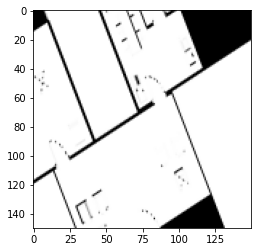

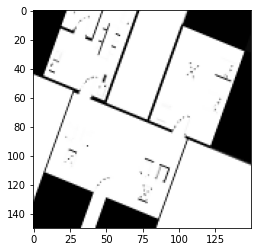

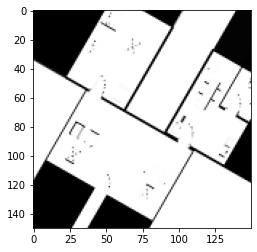

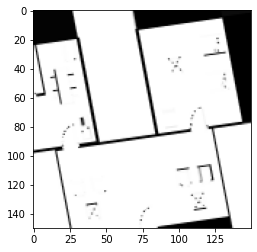

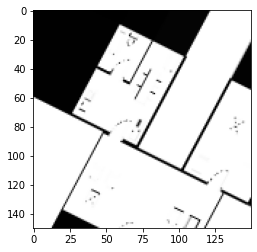

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img_path = os.path.join(train_basicFp_dir, train_basicFp_fnames[15])
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# The .flow() command below generates batches of randomly transformed images
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 5 == 0:
    break

In [10]:
# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# Flow validation images in batches of 32 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='categorical')

Found 999 images belonging to 5 classes.
Found 497 images belonging to 5 classes.


In [11]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(5, activation='softmax')(x)

# Configure and compile the model
model = Model(img_input, output)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [12]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0   

In [13]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=20,  # 200 images = batch_size * steps
      epochs=50,
      validation_data=validation_generator,
      validation_steps=10,  # 100 images = batch_size * steps
      verbose=2)

# history = model.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val))

/Users/areebakamil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
20/20 - 14s - loss: 1.7261 - acc: 0.2500 - val_loss: 1.4600 - val_acc: 0.3500
Epoch 2/50
20/20 - 14s - loss: 1.3875 - acc: 0.3559 - val_loss: 1.2108 - val_acc: 0.4100
Epoch 3/50
20/20 - 13s - loss: 1.3119 - acc: 0.3850 - val_loss: 1.4851 - val_acc: 0.2800
Epoch 4/50
20/20 - 13s - loss: 1.2835 - acc: 0.3910 - val_loss: 1.2294 - val_acc: 0.4300
Epoch 5/50
20/20 - 16s - loss: 1.2255 - acc: 0.4000 - val_loss: 1.2105 - val_acc: 0.4700
Epoch 6/50
20/20 - 16s - loss: 1.2612 - acc: 0.4286 - val_loss: 1.1993 - val_acc: 0.4400
Epoch 7/50
20/20 - 13s - loss: 1.2360 - acc: 0.4236 - val_loss: 1.1820 - val_acc: 0.4700
Epoch 8/50
20/20 - 13s - loss: 1.2111 - acc: 0.4275 - val_loss: 1.0923 - val_acc: 0.4400
Epoch 9/50
20/20 - 17s - loss: 1.1735 - acc: 0.4787 - val_loss: 1.0737 - val_acc: 0.5200
Epoch 10/50
20/20 - 18s - loss: 1.2110 - acc: 0.4550 - val_loss: 1.3029 - val_acc: 0.4200
Epoch 11/50
20/20 - 16s - loss: 1.1391 - acc: 0.4612 - val_loss: 1.2751 - val_acc: 0.4600
Epoch 12/50
20/20 -

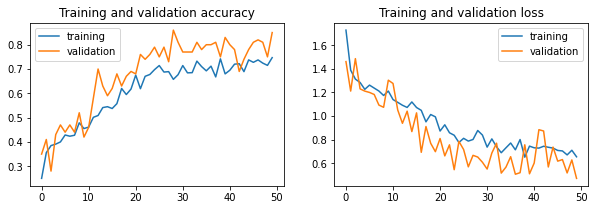

In [16]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))


# Plot training and validation accuracy per epoch
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(3)

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label = "training")
plt.plot(epochs, val_acc, label = "validation")
plt.title('Training and validation accuracy')
plt.legend(loc='best')

# Plot training and validation loss per epoch
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label = "training")
plt.plot(epochs, val_loss, label = "validation")
plt.title('Training and validation loss')
plt.legend(loc='best')

plt.show()

In [20]:
model.save("multiclass_classification_v2")

INFO:tensorflow:Assets written to: multiclass_classification_v2/assets
